In [5]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)


In [8]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [19]:
# 输出测试数据集的各个参数：
print("train_x_orig : \n" + str(train_x_orig.shape))
print("--------------------------------------")
print("train_y : \n" + str(train_y.shape))
print("--------------------------------------")
print("test_x_orig : \n" + str(test_x_orig.shape))
print("--------------------------------------")
print("test_y : \n" + str(test_y.shape))
print("--------------------------------------")
print("训练集样本数目： m_train = " + str(train_y.shape[1]))
print("测试集样本数目： m_test = " + str(test_y.shape[1]))

train_x_orig : 
(209, 64, 64, 3)
--------------------------------------
train_y : 
(1, 209)
--------------------------------------
test_x_orig : 
(50, 64, 64, 3)
--------------------------------------
test_y : 
(1, 50)
--------------------------------------
训练集样本数目： m_train = 209
测试集样本数目： m_test = 50


y = 0. It's a non-cat picture.


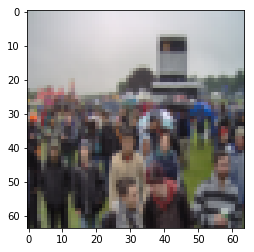

In [33]:
# 显示数据集的图片： print: y = 0. It's a non-cat picture.
index = 100
plt.imshow(train_x_orig[index])

print("y = " + str(train_y[0][index]) +". It's a " + classes[train_y[0][index]].decode("utf-8") + " picture." )




In [35]:
# 对训练集和测试集进行单列向量化，均值处理 其中： 12288 = 64 x 64 x3

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print("处理后： train_x = " + str(train_x.shape))

print("处理后： test_x = " + str(test_x.shape))

处理后： train_x = (12288, 209)
处理后： test_x = (12288, 50)


In [67]:
# 定义初始参数：
n_x = 12288
n_h = 7
n_y = 1

layers_dims = (n_x, n_h, n_y)


In [75]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        cost = compute_cost(A2, Y)
        
        dA2 = - (np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
    
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        
        if print_cost == True and i % 100 == 0:
            print("Cost after interations {}: {}".format(i, np.squeeze(cost)))
            
        if print_cost == True and i % 100 == 0:
            
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel("Cost")
    plt.xlabel("Learning_rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after interations 0: 0.6930497356599888
Cost after interations 100: 0.6464320953428849
Cost after interations 200: 0.6325140647912677
Cost after interations 300: 0.6015024920354665
Cost after interations 400: 0.5601966311605747
Cost after interations 500: 0.5158304772764729
Cost after interations 600: 0.47549013139433255
Cost after interations 700: 0.4339163151225749
Cost after interations 800: 0.4007977536203889
Cost after interations 900: 0.35807050113237976
Cost after interations 1000: 0.3394281538366412
Cost after interations 1100: 0.3052753636196265
Cost after interations 1200: 0.2749137728213017
Cost after interations 1300: 0.24681768210614838
Cost after interations 1400: 0.19850735037466105
Cost after interations 1500: 0.1744831811255665
Cost after interations 1600: 0.17080762978095967
Cost after interations 1700: 0.11306524562164735
Cost after interations 1800: 0.09629426845937156
Cost after interations 1900: 0.08342617959726861
Cost after interations 2000: 0.0743907870431

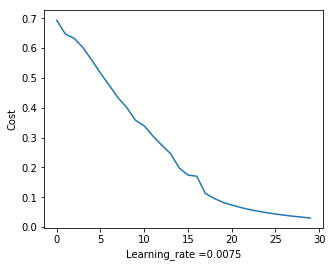

In [76]:

parameters = two_layer_model(train_x, train_y, 
                             layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = True)


In [78]:
predictions_train = predict(train_x, train_y, parameters)
print("Training Accuracy :" + str(predictions_train))

print("--------------------------------------------------")


prediction_test = predict(test_x, test_y, parameters)
print("Testing Accuracy :" + str(prediction_test))


Accuracy: 0.9999999999999998
Training Accuracy :[[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------------------------
Accuracy: 0.72
Testing Accuracy :[[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
  1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
  1. 0.]]


In [82]:
layers_dims = [12288, 20, 7, 5, 1] 

In [83]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878
Cost after iteration 2500: 0.088413
Cost after iteration 2600: 0.085951
Cost after iteration 2700: 0.081681
Cost

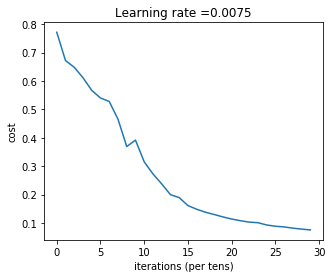

In [84]:
parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = True)

In [86]:
predictions_train = predict(train_x, train_y, parameters)
print("Training Accuracy :" + str(predictions_train))

print("--------------------------------------------------")


prediction_test = predict(test_x, test_y, parameters)
print("Testing Accuracy :" + str(prediction_test))

Accuracy: 0.9904306220095691
Training Accuracy :[[0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
  0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------------------------
Accuracy: 0.8200000000000001
Testing Accuracy :[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
  1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 0.]]


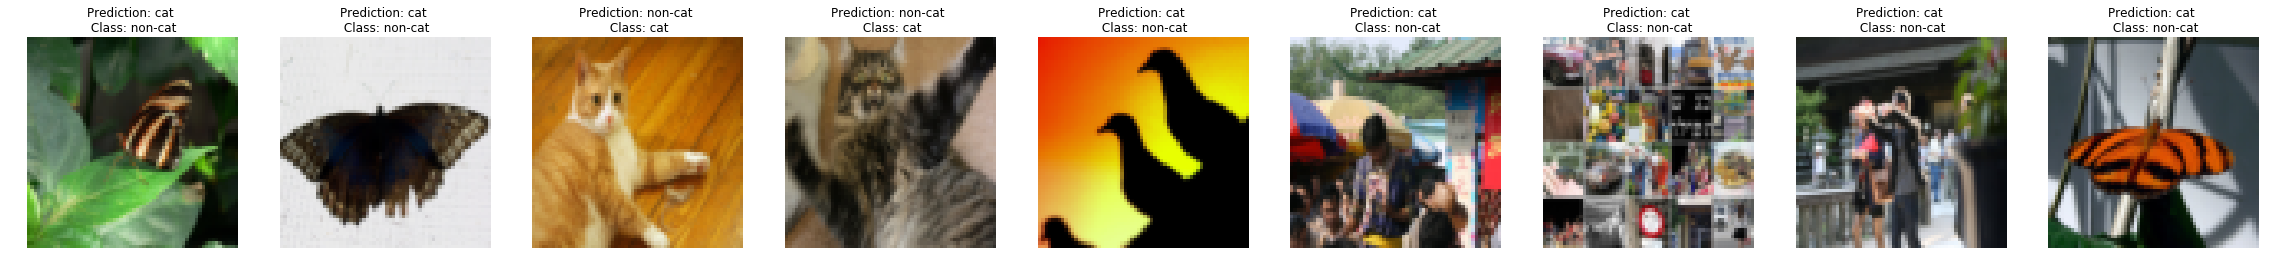

In [90]:
print_mislabeled_images(classes, test_x, test_y, prediction_test)